## Praca domowa 2

### Deadline: 
23:59 dnia 31-03-2022

### Opis: 
Zadanie polega na przetestowaniu modeli `Random Forest` oraz `XGBoost` na przykładowych zadaniach regresji i klasyfikacji, których dane znajdują się w folderze `homework2/data`. W pierwszej kolejności należy odpowiednio przygotować dane by mogły one zostać wykorzystane w wspomnianych modelach. W ramach zadania nie jest konieczne wykonanie eksploracji. Dane należy podzielić na zbiory treningowy, walidacyjny i testowy o odpowiednich proporcjach. Dla każdego z problemów należy wyszkolić oba modele porównując uzyskane przez nie wyniki np. accuracy/rmse na zbiorze walidacyjnym, dodatkowo dla każdego modelu należy przetestować kilka różnych zestawów hiperparametrów, takich jak np. n_estimators, max_depth i omówić ich wpływ na generalizacje modelu. Celem zadania nie jest natomiast znalezienie najlepszego zestawu hiperparametrów, tym będziemy się zajmowali w przyszłości.

Rozwiązanie należy umieścić w folderze homeworks/homework2/NazwiskoImie. Prosze nie wrzucać do tych katalogów przekopiowanych danych.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 16

# 1. Dane airline_passenger_satisfaction

In [2]:
airline_test = pd.read_csv("C:/Users/laura/Desktop/WARSZTATY BADAWCZE/2022L-WB-ML-2-main/homeworks/homework2/data/airline_passenger_satisfaction/test.csv")
airline_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
airline_train = pd.read_csv("C:/Users/laura/Desktop/WARSZTATY BADAWCZE/2022L-WB-ML-2-main/homeworks/homework2/data/airline_passenger_satisfaction/train.csv")
airline_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
airline = airline_test.append(airline_train, ignore_index = True)

airline

C:\Users\laura\AppData\Local\Temp\ipykernel_12244\3772532634.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline = airline_test.append(airline_train, ignore_index = True)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Data processing

In [5]:
airline = airline.drop(["Unnamed: 0", "id"], axis = 1)

airline['Gender'] = (airline['Gender'] == 'Female')*1  # czy jest KOBIETA
airline['Customer Type'] = (airline['Customer Type'] == 'Loyal Customer')*1  # czy LOJALNY
airline['Type of Travel'] = (airline['Type of Travel'] == 'Business travel')*1  # czy BIZNESOWY
airline['satisfaction'] = (airline['satisfaction'] == 'satisfied')*1  # czy USATYSFAKCJONOWANY

airline['Class'] = (airline['Class'] == 'Eco')*1 + (airline['Class'] == 'Eco Plus')*2 + (airline['Class'] == 'Business')*3
# Eco - 1, EcoPlus - 2, Business - 3

for col in ['Age','Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    transf = airline[col].values.reshape(-1,1)
    scaler = StandardScaler().fit(transf)
    airline[col] = scaler.transform(transf)

airline = airline[airline["Arrival Delay in Minutes"].isna()==False]

airline

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,0.831523,1,1,-1.032952,5,4,3,4,...,5,5,5,5,2,5,5,0.926855,0.751553,1
1,1,1,-0.226727,1,3,1.676962,1,1,3,1,...,4,4,4,4,3,4,5,-0.386481,-0.392329,1
2,0,0,-1.284977,1,1,-1.000870,2,0,2,4,...,2,4,1,3,2,2,2,-0.386481,-0.392329,0
3,0,1,0.302398,1,3,2.192277,0,0,0,2,...,1,1,1,1,3,1,4,-0.386481,-0.236345,1
4,1,1,0.633101,1,1,-0.008338,2,3,4,3,...,2,2,2,2,4,2,4,-0.386481,0.127617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,-1.086555,1,1,-1.000870,2,1,2,3,...,2,3,1,4,2,3,2,-0.307681,-0.392329,0
129876,0,1,0.633101,1,3,1.159642,4,4,4,4,...,5,5,5,5,5,5,4,-0.386481,-0.392329,1
129877,0,0,-0.623571,1,3,0.806742,1,1,1,3,...,4,3,2,4,5,5,4,-0.202614,-0.028366,0
129878,1,0,-1.152696,1,1,-0.190803,1,1,1,5,...,1,4,5,1,5,4,1,-0.386481,-0.392329,0


In [6]:
y = airline["satisfaction"]
X = airline.drop("satisfaction", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    random_state=420, train_size=0.7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    random_state=420, train_size=0.7)

## Szkolenie modelu

### RandomForest

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train).score(X_test, y_test)

0.9613354956624707

In [8]:
rf.estimators_[:5]

[DecisionTreeClassifier(max_features='auto', random_state=1937378352),
 DecisionTreeClassifier(max_features='auto', random_state=698713504),
 DecisionTreeClassifier(max_features='auto', random_state=1529001245),
 DecisionTreeClassifier(max_features='auto', random_state=781700080),
 DecisionTreeClassifier(max_features='auto', random_state=46148170)]

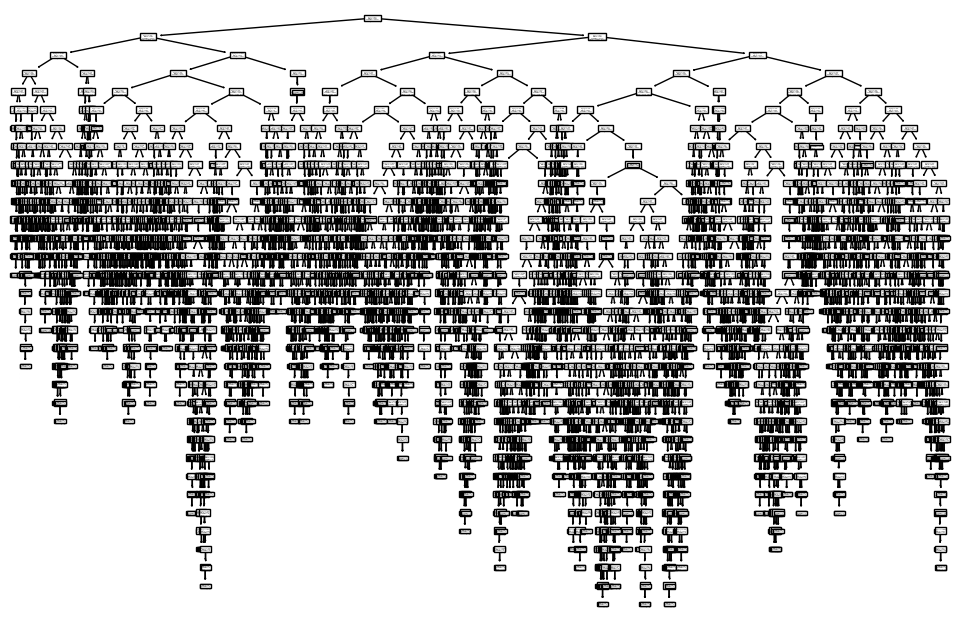

In [9]:
plt.figure(dpi=100)
plot_tree(rf.estimators_[0])
plt.show()

### XGBoost

In [10]:
xgb = XGBClassifier(objective="binary:logistic", seed = 42, use_label_encoder=False)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9616701418384946

#### Hiperparametry

In [11]:
xgb = XGBClassifier(objective="binary:logistic", seed=42, use_label_encoder=False, max_depth=20)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9624681442582439

In [12]:
xgb = XGBClassifier(objective="binary:logistic", seed=42, use_label_encoder=False, max_depth=3)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9550801863721781

Po zwiększeniu (do 20) `max_depth` wynik wyszedł o ok 0.001 większy, a po zmniejszeniu (do 3) - o ok 0.01 mniejszy.

# 2. Dane car_prices_poland

In [13]:
cars = pd.read_csv("C:/Users/laura/Desktop/WARSZTATY BADAWCZE/2022L-WB-ML-2-main/homeworks/homework2/data/car_prices_poland/Car_Prices_Poland.csv")
cars

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


### Data processing

In [14]:
cars = cars.drop(["Unnamed: 0", "mark", "model", "generation_name", "city", "province"], axis = 1)

encoded = pd.get_dummies(cars["fuel"].astype(str))
cars = cars.drop("fuel", axis=1)
cars = pd.concat([cars, encoded], axis = 1)

cars

,year,mileage,vol_engine,price,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,2015,139568,1248,35900,0,1,0,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0,0
4,2014,103000,1400,35900,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,0,0,1,0
117923,2017,51000,1969,229900,0,1,0,0,0,0
117924,2016,83500,1969,135000,0,0,0,1,0,0
117925,2017,174000,1969,154500,0,1,0,0,0,0


## Train_test_split

In [15]:
y = cars["price"]
X = cars.drop("price", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    random_state=420, train_size=0.7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    random_state=420, train_size=0.7)

## Szkolenie modelu

### RandomForest

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train).score(X_test, y_test)

0.874466416606495

In [17]:
rf.estimators_[:5]

[DecisionTreeRegressor(max_features='auto', random_state=1149999696),
 DecisionTreeRegressor(max_features='auto', random_state=1889043986),
 DecisionTreeRegressor(max_features='auto', random_state=618884834),
 DecisionTreeRegressor(max_features='auto', random_state=1249546441),
 DecisionTreeRegressor(max_features='auto', random_state=1197399931)]

In [18]:
len(rf.estimators_)

100

### XGBoost

In [21]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.8812794760023281

In [22]:
xgb = XGBRegressor(max_depth=10)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.8797404334611131

In [23]:
xgb = XGBRegressor(max_depth=3)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.8478652573982863

W tym wypadku zmiana parapetru `max_depth` pogorsza nam wynik.